# Introduction

We ranked neighborhoods based on overall safety, taking into consideration a few important factors. The most obvious is the crime rate. However, the normal crime rate takes into consideration non-violent crimes like drug offenses and white collar crimes. While it can be argued these are still things you don't want going on in your neighborhood, they don't necessarily compromise your safety. So instead, we decided to look at the major crime rate, which only takes into account severe violent crimes, like assault, robbery, or murder. In our analysis, we actually found that while there is a positive correlation between total crime rate and major crime rate, it is a much looser connection than you might expect, and restricting our view to major crimes does in fact change the order of the rankings. We used the [major crimes dataset](https://data.wprdc.org/dataset/a-community-profile-of-pittsburgh-neighborhoods-1974).

We also examined the extent to which each neighborhood was affected by the Covid-19 pandemic. In addition to the third dataset on vaccine adherence, this gives an idea of how viral infections spread within the community, which is important for safety, especially for vulnerable populations like the elderly or immunocompromised.

The last point of our analysis of the data concerns Covid vaccine adherence. We know that vaccines work best when a population attains effective herd immunity. This is admittedly the most dubious measurement of safety, not because public health is a lesser concern, but because there is a lot of exchange between neighborhoods and someone could just get Covid from somewhere else. However, a higher adherence does indeed make the area less susceptible to spreading the virus. This makes areas with high vaccine adherence safer than those with lower adherence. We used the [municipal Covid vaccine dataset](https://data.wprdc.org/dataset/allegheny-county-covid-19-vaccinations).

One thing that is notably missing from this analysis of which neighborhood is best is any sort of cost factors. We decided to measure how good a neighborhood is to live in without regards to how easy it is to actually live there. This means that we don't need to look at stuff like rent prices or grocery prices or general cost of living. The point is, even though an area might be costly, the only data we are concerned with is objective safety. There are many ways of measuring which neighborhood is best, and cost is certainly a good way, but we decided to take another angle that is different from many other analyses.

## Dataset 1 (sam)

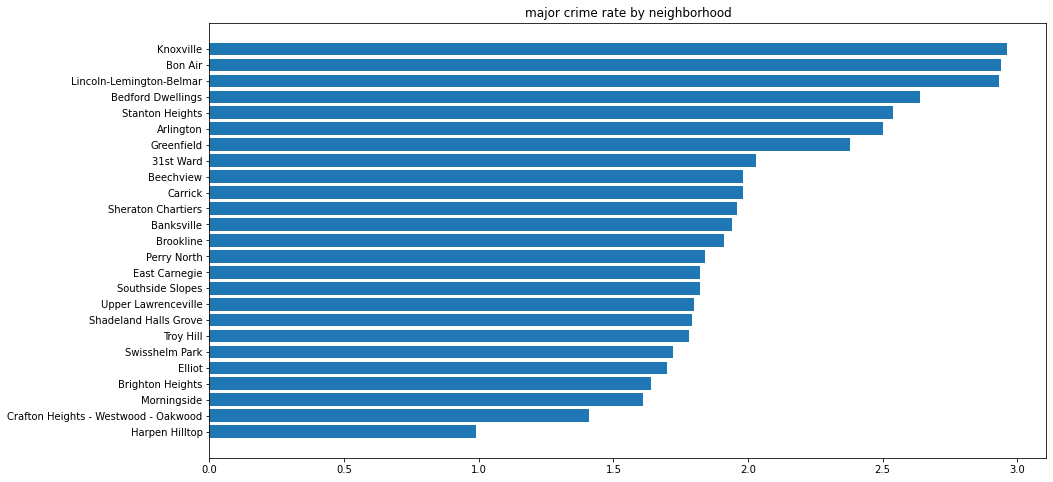

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
df2 = pd.read_csv("crimes.csv")
df2.sort_values("overall_crime_rate", inplace=True)
index = df2.iloc[:, 3] < 3
plt.title("major crime rate by neighborhood")
plt.barh(df2.iloc[:, 1][index], df2.iloc[:, 3][index])
plt.show()

## Dataset 2 (sid)

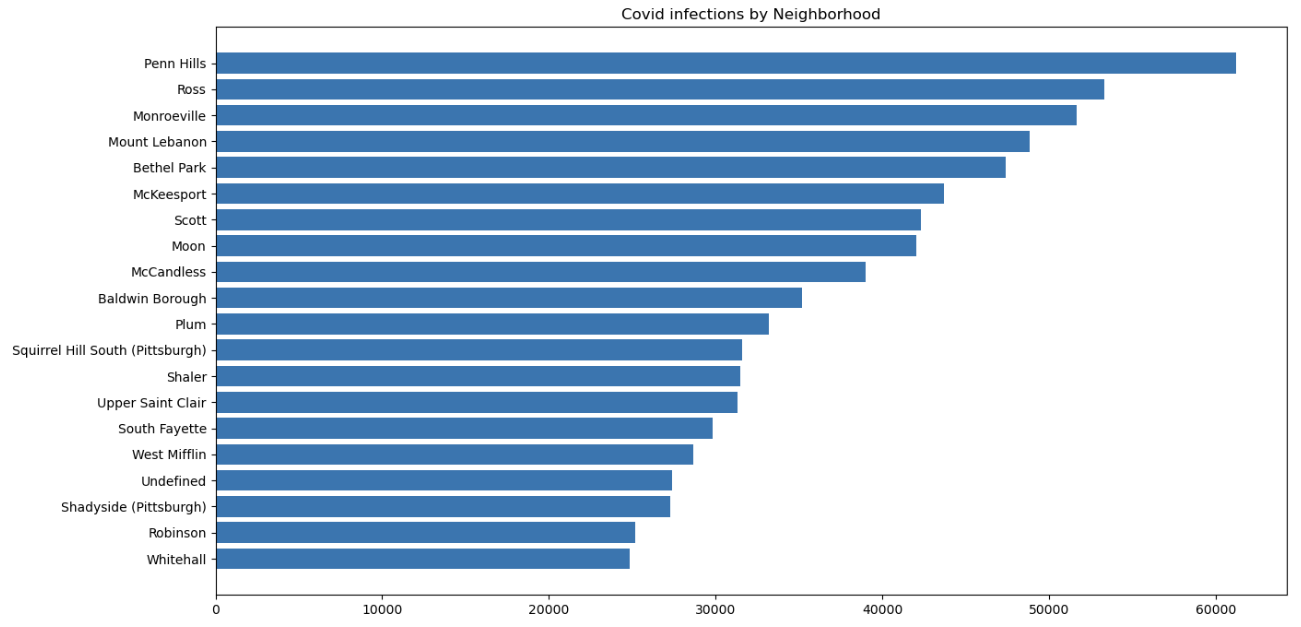

My data based on COVID-19 infections shows that the top neighborhood is Whitehall. Based on the data, Whitehall is the neighborhood with the least amount of COVID-19 infections. The worst neighborhood is Penn Hills as it has the most covid cases.

## Dataset 3 (sam)

In [68]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
df = pd.read_csv("covid.csv")
df.sort_values("bivalent_booster", ascending=False, inplace=True)

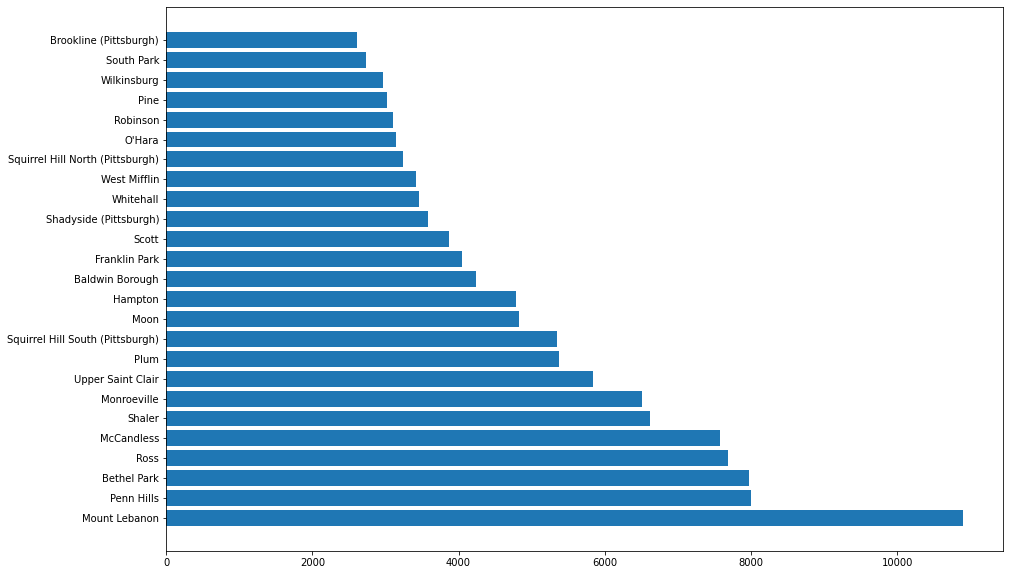

In [69]:
top = df.head(25)
plt.barh(top["neighborhood_municipality"], top["bivalent_booster"])
plt.show()

In [87]:
covid_sh = top.loc[top["neighborhood_municipality"] == "Shadyside (Pittsburgh)"]["bivalent_booster"][146]

In [91]:
pd.set_option('display.max_rows', 70)
x1 = df2.loc[df2["neighborhood"] == "Shadyside"]
pop_sh = x1["population"][52]
covid_sh / pop_sh

0.2124859192506077

# The Best Neighborhood

Using a weighted average of our three measures of safety, we have determined that Shadyside is the best neighborhood in Pittsburgh. 

# Conclusion

#### Sam

While it's kind of hard to deny the findings of our analysis of the data, it has made basically zero impact on my opinion about what the best neighborhood is. To me, South Oakland is the best neighborhood. There isn't even any real justification to this, and in many ways it's objectively untrue, and most people would probably agree that Shadyside is way better than South Oakland. Since this part is subjective, though, I would still say it's the best neighborhood. I live there, all my friends live there, and there are a lot of friendly stray cats everywhere. It's also home to Dan Marino park (if you can call it a park?) which immediately puts it head and shoulders above everywhere else. 

South Oakland definitely has some issues with safety. I don't recommend anyone goes walking around alone at later hours or early in the morning, but it's still pretty safe even though it's bad compared to other neighborhoods. There is no neighborhood anywhere in Pittsburgh that compares to where I came from in New York in terms of how much violence and crime and just general sketchy stuff going on all the time. So in my view, it's a big improvement. Everybody always complains about how much trash there is along the side of the road, but I honestly don't see the difference between South Oakland and other areas of the city in this respect. South Oakland also has neighborhood volunteer clean ups multiple times a year and they always have a bunch of people show up. Nothing against Shadyside, but I don't think I would like living there.


#### Sid

However, my opinion is that Shadyside is the best neighborhood because of believe with all things considered. It still had less covid cases compared to other neighborhoods and it is my personal favorite neighborhood because of all of the fun activities you can do there.

## calculations and stuff
<hr />

In [75]:
raw = list(df2["neighborhood"])
cleaned = [name.lower().replace(" ", "").replace("'", "").replace("-", "") for name in raw]
cleaned.sort()

In [74]:
raw2 = list(df["neighborhood_municipality"])
cleaned2 = [name.lower().replace(" ", "").replace("'", "").replace("-", "") for name in raw2]
cleaned2.sort()
cleaned2 = [name.replace("(pittsburgh)", "") for name in cleaned2 if "(pittsburgh)" in name]

In [80]:
shared = set(cleaned).intersection(set(cleaned2))

In [111]:
def is_shared(entry):
    entry = entry.str.lower()
    entry = entry.str.replace(" ", "")
    entry = entry.str.replace("'", "")
    entry = entry.str.replace("-", "")
    entry = entry.str.replace("\(pittsburgh\)", "", regex=True)
    result = [] # yeah this is kinda bad, but it does the trick and it's fine for relatively small datasets
    for item in list(entry):
        if item in shared:
            result.append(True)
        else: result.append(False)
    return result

In [119]:
cleaned_crime_df = df2[is_shared(df2["neighborhood"])]
cleaned_covid_df = df[is_shared(df["neighborhood_municipality"])]
cleaned_crime_df = list(cleaned_crime_df.sort_values("neighborhood")
cleaned_covid_df = cleaned_covid_df.sort_values("neighborhood_municipality")

In [143]:
import numpy as np
arr1 = np.array(cleaned_crime_df["overall_crime_rate"])
arr2 = np.array(cleaned_covid_df["bivalent_booster"])
final_score = arr2 - 10 * arr1
winning_index= np.argmax(final_score)

In [138]:
cleaned_crime_df.iloc[winning_index]

_id                               53
neighborhood               Shadyside
population                     16867
overall_crime_rate              7.26
number_arrests_murder              0
crime_rate_murder                0.0
number_arrests_rape               24
crime_rate_rape                 0.14
number_arrests_robbery           148
crime_rate_robbery              0.87
number_arrests_assault            83
crime_rate_assault              0.49
number_arrests_burglary          482
crime_rate_burglary             2.85
number_arrests_larceny           492
crime_rate_larceny              2.91
Name: 52, dtype: object

In [139]:
cleaned_covid_df.iloc[winning_index]

_id                                           25623
neighborhood_municipality    Shadyside (Pittsburgh)
bivalent_booster                               3584
Name: 146, dtype: object

In [144]:
losing_index = np.argmin(final_score)
cleaned_crime_df.iloc[losing_index]

_id                                       2
neighborhood               Allegheny Center
population                              588
overall_crime_rate                    52.04
number_arrests_murder                     0
crime_rate_murder                       0.0
number_arrests_rape                       2
crime_rate_rape                        0.34
number_arrests_robbery                   24
crime_rate_robbery                     4.08
number_arrests_assault                   30
crime_rate_assault                      5.1
number_arrests_burglary                  14
crime_rate_burglary                    2.38
number_arrests_larceny                  236
crime_rate_larceny                    40.14
Name: 1, dtype: object

<BarContainer object of 51 artists>

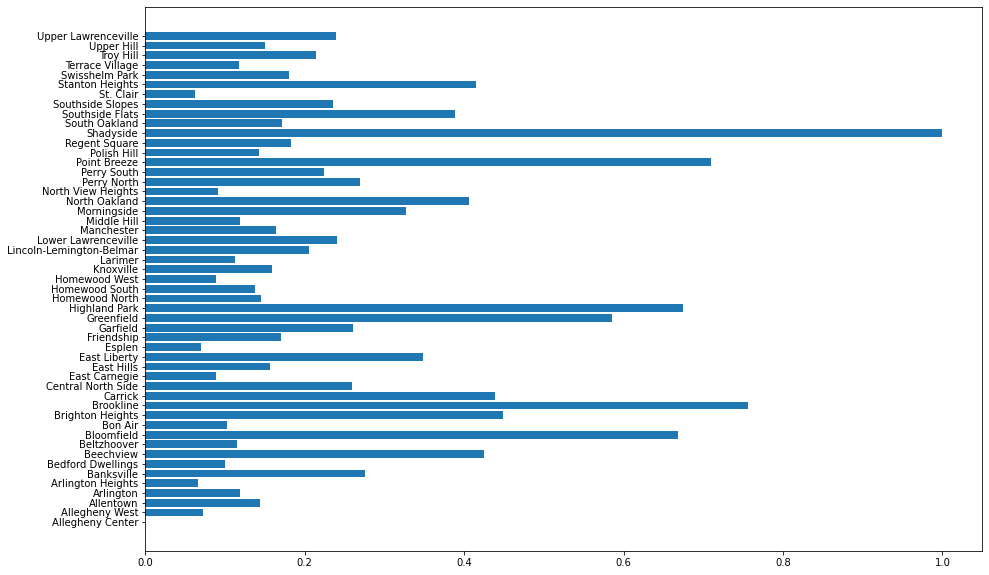

In [146]:
normalized = (final_score - np.min(final_score)) / (np.max(final_score) - np.min(final_score))
plt.barh(cleaned_crime_df["neighborhood"], normalized)